<h1 align="center"> Tsouros Iakovos Marios </h1>
<h1 align="center"> Computational Solid State Physics </h1>
<h1 align="center"> Problem 2 </h1>

## Assignment

Consider a square grid of 2 dimensions of size 450x 450and place a particle in the center.Then create a circle with a radius of 200, centered in the square grid. Then select a new particle and place it randomly at a point on the periphery of the circle. The new particle performs a random walk until one of the following possibilities occurs: (a) occupies a position "next" to the central particle, on either side of it (b) it leaves far enough away from the original area (exits the grid). In case(a) this particle is attached to the original particle, its path stops, and so now there is an aggregation of two particles. In case (b) the particle should not leave the grid but it should be repositioned at the periphery of the circle at another random point, and continue its random walk. The process is repeated for a third, fourth particle, etc. and continues  for  as  many  particles  as  needed  until  the  growing  aggregate  from  the  center  of  the  circle touches its circumference.Sketch the state of the system at the end of the process.Determine the fractal dimension of the structure you created using the following method: First, select a position in the grid randomly at a maximum distance of 10 grid sites from the center of the circle. This position now becomes the center of a square with side L = 10. You count the number of sites M that are occupied by particles in this square that has dimensions 10x10. Then increase L by 10 and create a new square with the same center and side L = 20. Now calculate the new M. Continue the process by enlarging the side of the square, so that you finally have 10 such squares with the last one having side L = 100. Make the  graph  of  L  as  a  function  of  M.  If  this  structure  is  fractal  then  the  number  of  occupied  positions  M follows a relation of the form $M ~ L^{df}$, with $d_f$ being the fractal dimension of this structure. Therefore, by depicting in a log-log diagram the quantity M for the various values of L, we find the dffrom the slope. We must make N runs of the process and obtaintheir mean. So we repeat this process N = 20 times, we keep the values of M for the N repetitions and we calculate the average of the 10 values of M. Finally, we find the dimension $d_f$ in the above way.

## Solution

For the first part of the exercise, a `C++` script was used which can be found in the attached files. The script produces an output `.txt` file named `walkthis.txt` which is then processed with the following python code to produce the desired results.

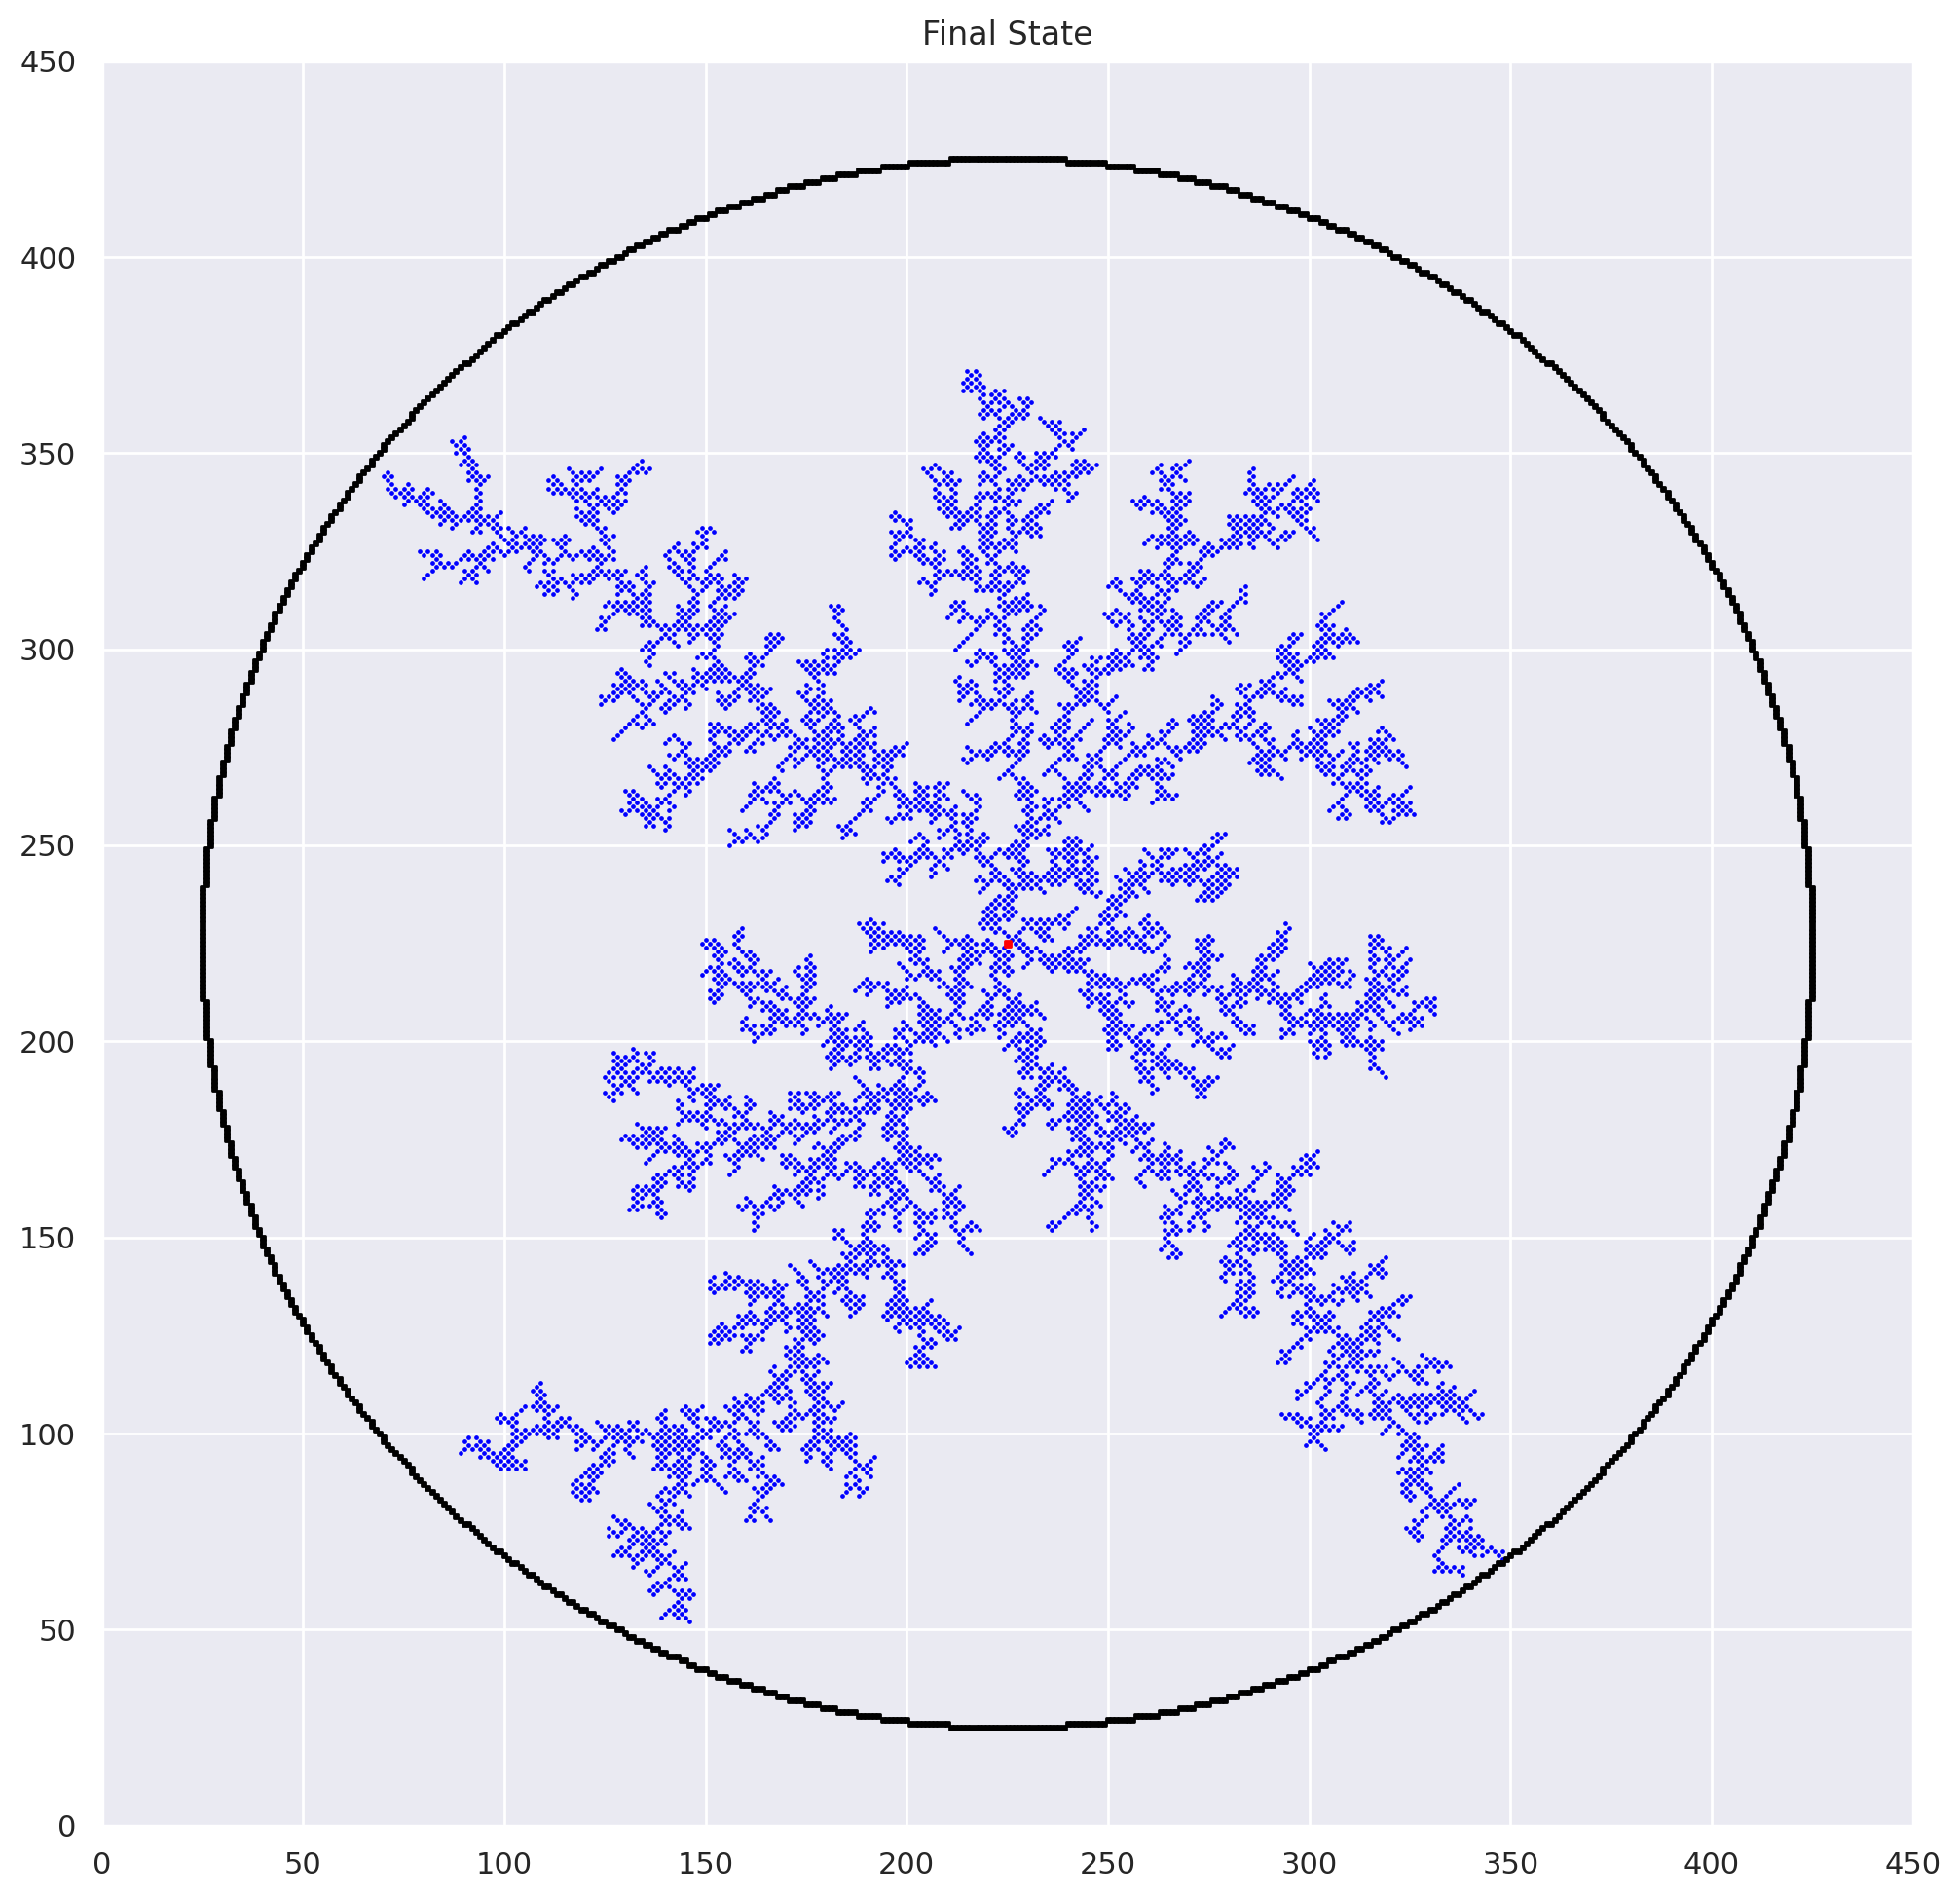

In [148]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

sns.set_theme()

def midpoint_circle(radius, x0, y0):
    """ Draws a circle on a bitmap (grid)
    using the midpoint circle algorithm.
    """
    f = 1 - radius
    ddf_x = 1
    ddf_y = - 2 * radius
    x = 0
    y = radius
    pts = set()
    pts.update([
        (x0, y0 + radius),
        (x0, y0 - radius),
        (x0 + radius, y0),
        (x0 - radius, y0)
    ])
    while x < y:
        if f >= 0:
            y -= 1
            ddf_y += 2
            f += ddf_y
        x += 1
        ddf_x += 2
        f += ddf_x
        pts.update([
            (x0 + x, y0 + y),
            (x0 - x, y0 + y),
            (x0 + x, y0 - y),
            (x0 - x, y0 - y),
            (x0 + y, y0 + x),
            (x0 - y, y0 + x),
            (x0 + y, y0 - x),
            (x0 - y, y0 - x),
        ])
    return pts
        
circle_pts = midpoint_circle(200, 225, 225)
particles = [(225, 225)] # Central Particle

# Load results from C solution.
ff = np.loadtxt("walkthis.txt", delimiter=",", dtype=np.int32)

fig, ax = plt.subplots(figsize=(12, 12), dpi=200)
ax.set_xlim([0, 450])
ax.set_ylim([0, 450])

ax.scatter(ff[:, 0], ff[:, 1], color="blue", s=0.5)
ax.scatter(*zip(*circle_pts), color="black", marker="s", s=2)
ax.scatter(particles[0][0], particles[0][1], color="red", marker="s", s=5)
ax.set_title("Final State")
plt.show()


--- 

### Solution (continued)

The following script counts the occurences of occupied grid points in a randomly placed square around the center of the fractal. The process is repeated 20 times, and a mean value of the occurences per side length of the square is produced.

In [147]:
import numpy as np

def count_occupied(L, center, fractal):
    grid = set()
    counter = 0
    ctr_x_min = int(center[0] - L/2)
    ctr_x_max = int(center[0] + L/2)
    ctr_y_min = int(center[1] - L/2)
    ctr_y_max = int(center[1] + L/2)
    for x in range(ctr_x_min, ctr_x_max):
        for y in range(ctr_y_min, ctr_y_max):
            grid.add(tuple((np.array([x, y]))))

    for occ in grid:
        if occ in fractal:
            counter += 1
    return counter

rng = np.random.default_rng(4385)
M = list()
fractal = set(tuple(x) for x in ff)
Ls = np.arange(10, 101, 10)
for i in range(20):
    center = rng.choice(np.arange(215, 236), size=2) # Randomly choose center point
    M.append([count_occupied(L, center, fractal) for L in Ls])
mean_M = np.mean(M, axis=0)

---
### Solution (continued)

Finally, a log-log plot is produced following the relation $M$ ~ $L^{df}$, and the dimension of the fractal is found through the slope of the plot. The fractal dimension in this case is ~1.8386. 

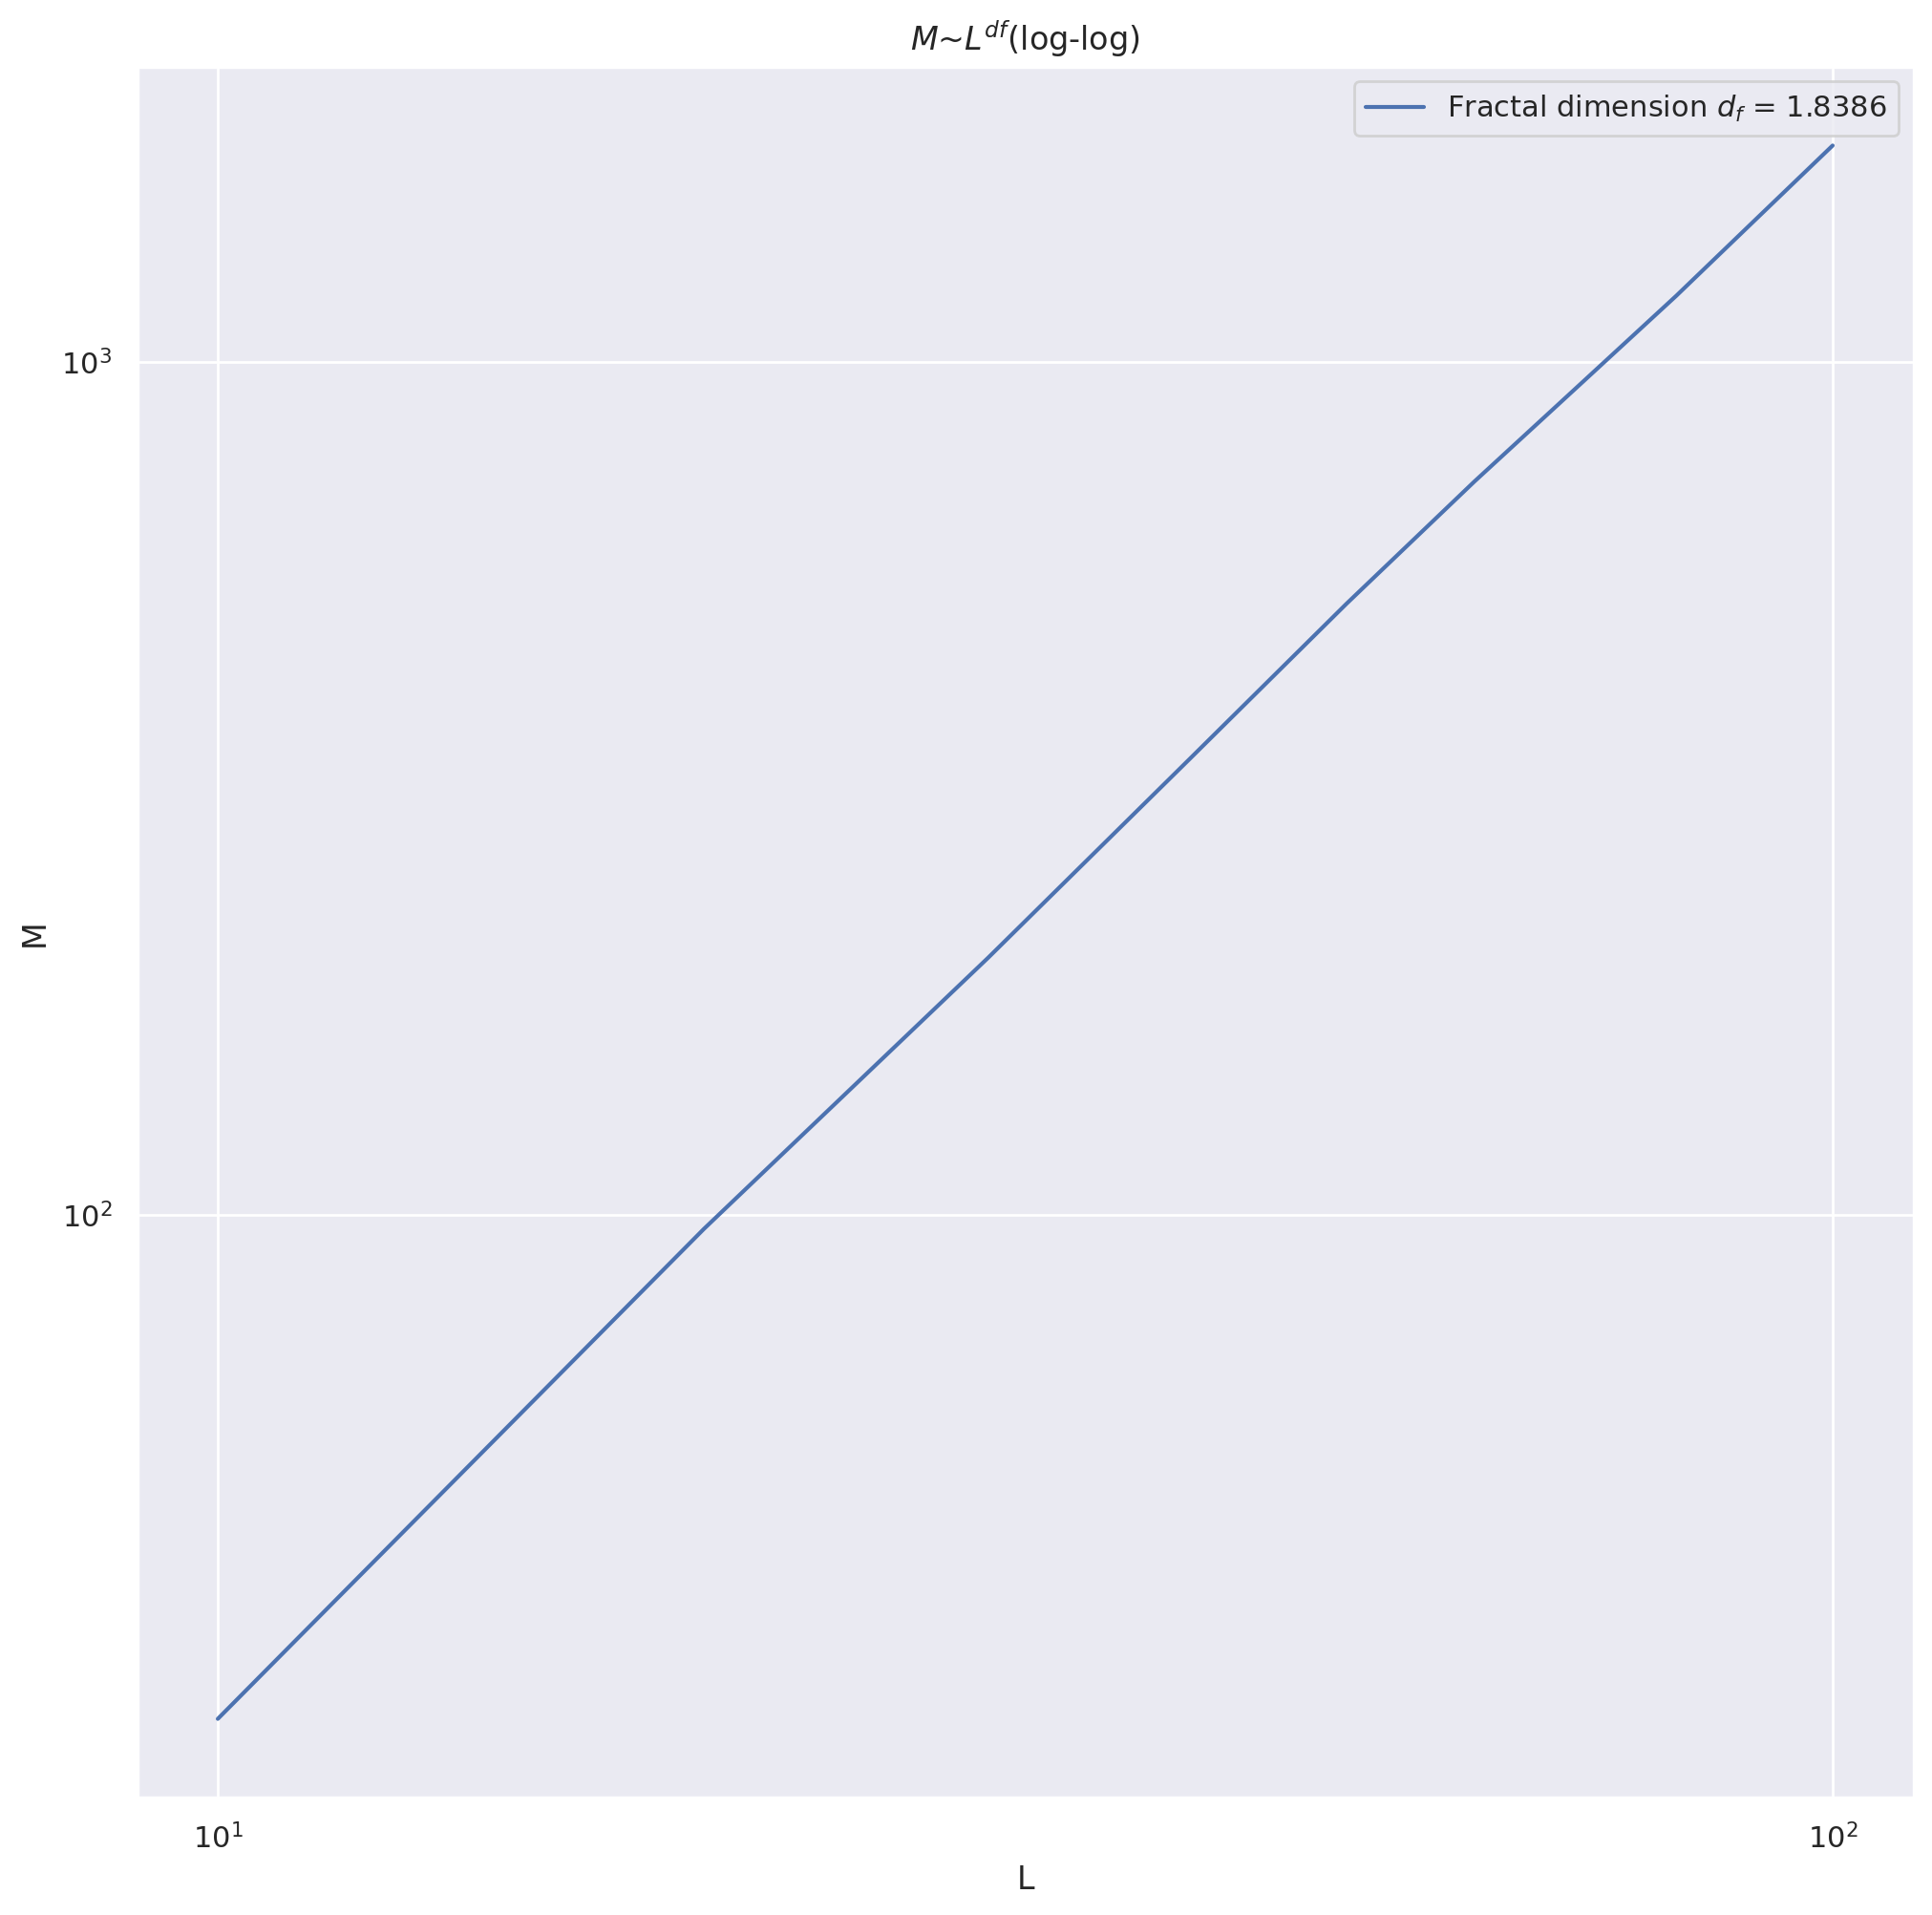

In [149]:
fig, ax = plt.subplots(figsize=(12, 12), dpi=200)
ax.loglog(np.arange(10, 101, 10), mean_M)
slope, intercept = np.polyfit(np.log(Ls), np.log(mean_M), 1) # linear fit
ax.set_title("$M $~$ L^{df}$(log-log)")
ax.set_xlabel("L")
ax.set_ylabel("M")
ax.legend([f"Fractal dimension $d_f$ = {slope:.4f}"])
plt.show()